In [2]:
from src.makedata import *
from src.makemodel import *
from src.makepred import *

In [3]:
# load testing patches from testing slides
batch = 1
phases=["test"]
dataname="nonsclerotic"
dataLoader = {}
for phase in phases:
    dataLoader[phase] = Data_Loader(dataname,phase,batch,False)
    dataset_size = len(dataLoader[phase])
    print('%s images = %d' % (phase, dataset_size))

test images = 1020


In [4]:
isTrain = False  # set isTrain=False in testing mode
isContinue = False
savedir = "./log/"
loadpath = "UNet_nonscl_pre387*.pth"

In [5]:
model = GlomNet(isTrain, isContinue, savedir, loadpath, "UNet")

_CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)
[CREATE] MODEL


Downloading: "https://download.pytorch.org/models/vgg13_bn-abd245e5.pth" to /root/.cache/torch/checkpoints/vgg13_bn-abd245e5.pth



UNet
UNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(12

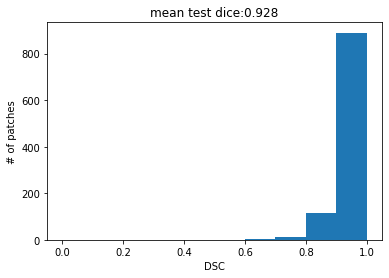

In [6]:
# show overall performance on testing patches
show_hist(phase,dataLoader,model)

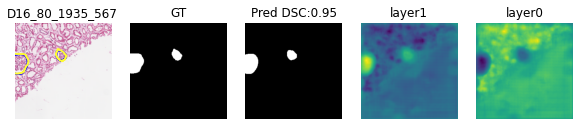

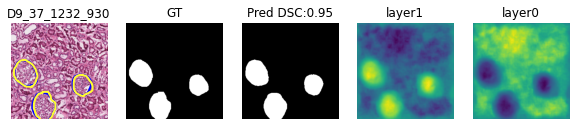

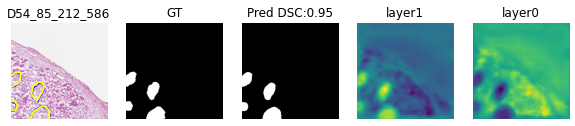

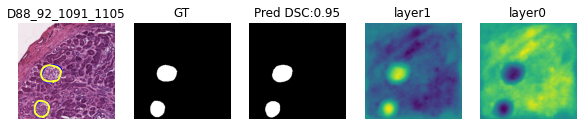

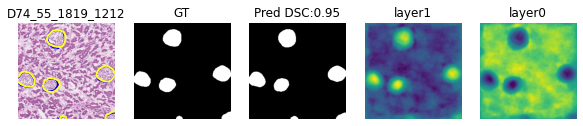

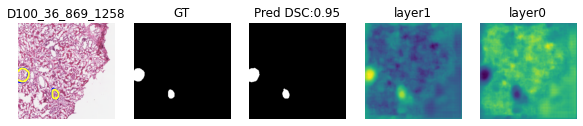

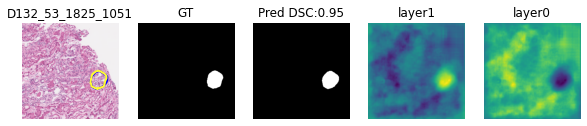

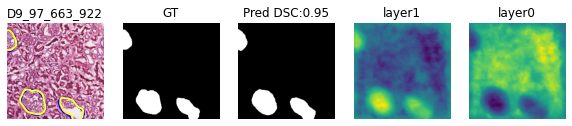

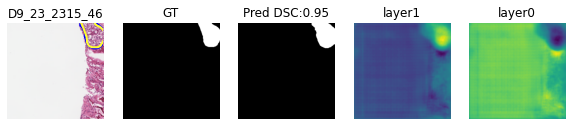

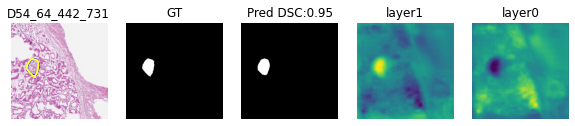

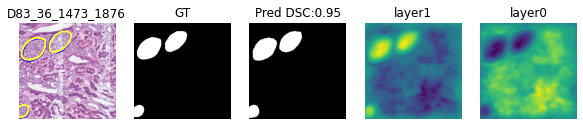

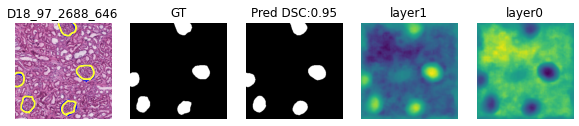

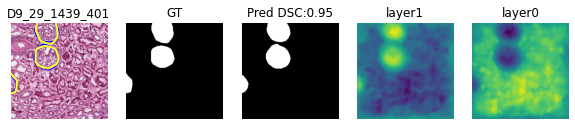

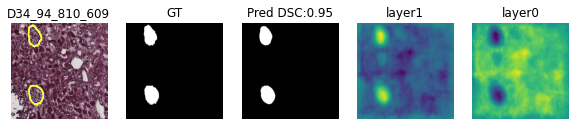

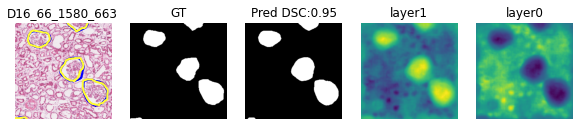

In [9]:
# show predictions within a dice score range, yellow contours are groundtruth(GT), blue contours are predictions 
for ii , data in enumerate(dataLoader[phase]):
    pred = show_output(model,data,0.95,0.951)